### Presentación:

Un banco portuguez ha encontrado una disminución en sus ingresos. Luego de investigar al respecto se descubrió que el problema radicaba en que los clientes no estaban invirtiendo lo suficiente en plazos fijos a largo plazo, por lo que las autoridades han decidido identificar cuales de los clientes existentes tienen una mayor posibilidad de hacer depósitos a largo plazo de forma de enfocar los esfuerzos de marketing en ellos.
Los datos de los que disponemos provienen de campañas de marketing directo basadas en llamadas telefónicas. En muchos casos se necesitó más de un contacto con el cliente para determinar si este se suscribiría a un depósito a largo plazo o no.

### Objetivos de la investigación:

Se desea determinar qué clientes de este banco son posibles suscriptores a un depósito a largo plazo (tambien conocido como Plazo Fijo). Para realizar estas prediciones analizaremos a que otros servicios financieros se encuentran suscriptos y algunas de sus características personales.

### Equipo de trabajo:

* Victoria Gardella
* Pablo Rabal
* Ornella Padini

### Fuente del Dataset:

Nuestra base de datos fue obtenida de la pagina Kaggle (URL: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification). El dataset se encuentra en formato "csv" y cuenta con dos conjuntos de datos, uno de entrenamiento de aproximadamente 30.000 registros y 16 atributos, y uno de testeo, de aproximadamente 8.000 registros y 15 atributros. El dataset de entrenamiento contiene un atributo único denominado "Y", el cual indica si el resultado deseado (la suscripción del cliente a un depósito a largo plazo o plazo fijo) es positivo ("yes") o negativo ("no").

### Criterio de selección:

Dado que nosotros no realizamos la seleccion de los datos ni la conformación de la base de datos no podemos estar seguros de los criterios que fueron usados.
Los criterios que tuvimos en cuenta para seleccionar este dataset fueron el tipo de variables incluidas (se incluyen tanto variables categóricas como numéricas) y el número total de registros.

### Base de datos:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Iniciamos este informe importando la base de datos:

#df_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bases de Datos/Clasificación de clientes de banco - Train.csv")
df = pd.read_csv('Clasificación de clientes de banco - Train.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [ ]:
#Hacemos una copia de respaldo de los datos:

df_respaldo = df.copy(deep=True)

NameError: ignored

### Data Wrangling:

Dado que los datos que usaremos fueron obtenidos de una página de terceros y no directamente de la entidad bancaria, los primeros pasos del proceso de manipulación de datos o "Data Wrangling" ya fueron llevados a cabo. En nuestro caso vamos a iniciar limpiando la base de datos y buscando datos duplicados:

In [ ]:
df_dupl = df[df.duplicated()]
df_dupl

NameError: ignored

Nuestro problema es que, aunque parecieran ser datos duplicados, no podemos determinar que lo sean porque no contamos con un ID del cliente o alguna clave identificatoria, por lo que vamos a mantener todos los datos.

Para poder movernos con mayor facilidad en caso de necesitar cambiar las variables categóricas de las cuales disponemos haremos un paqueño diccionario indicando las claves de cada atributo. Para eso, cambiaremos los atributos de tipo "objeto" a tipo "categoria":

In [ ]:
#Debido a que la librería Pandas nos devuelve un codigo de precaución debemos correr el siguiente código para poder hacer la modificación deseada:

pd.options.mode.chained_assignment = None

In [ ]:
cat_col = df.select_dtypes(include=["object"]).columns
cat_col

df[cat_col] = df[cat_col].astype("category")

df.dtypes


age               int64
job            category
marital        category
education      category
default        category
housing        category
loan           category
contact        category
month          category
day_of_week    category
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome       category
y              category
dtype: object

Luego de cambiar el tipo de datos de "object" a "category" procedemos a armar el diccionario:

In [ ]:
keys = {}
df_columns = list(df.select_dtypes("category").columns)

#Para armar el diccionario vamos a seleccionar las columnas que modificamos anteriormente y vamos a usar el comando enumerate()
#para enumerar las variables categoricas que pueden encontrarse.

for i in df_columns:
    d = dict(enumerate(df[i].cat.categories))
    keys[i] = d

keys

{'job': {0: 'admin.',
  1: 'blue-collar',
  2: 'entrepreneur',
  3: 'housemaid',
  4: 'management',
  5: 'retired',
  6: 'self-employed',
  7: 'services',
  8: 'student',
  9: 'technician',
  10: 'unemployed',
  11: 'unknown'},
 'marital': {0: 'divorced', 1: 'married', 2: 'single', 3: 'unknown'},
 'education': {0: 'basic.4y',
  1: 'basic.6y',
  2: 'basic.9y',
  3: 'high.school',
  4: 'illiterate',
  5: 'professional.course',
  6: 'university.degree',
  7: 'unknown'},
 'default': {0: 'no', 1: 'unknown', 2: 'yes'},
 'housing': {0: 'no', 1: 'unknown', 2: 'yes'},
 'loan': {0: 'no', 1: 'unknown', 2: 'yes'},
 'contact': {0: 'cellular', 1: 'telephone'},
 'month': {0: 'apr',
  1: 'aug',
  2: 'dec',
  3: 'jul',
  4: 'jun',
  5: 'mar',
  6: 'may',
  7: 'nov',
  8: 'oct',
  9: 'sep'},
 'day_of_week': {0: 'fri', 1: 'mon', 2: 'thu', 3: 'tue', 4: 'wed'},
 'poutcome': {0: 'failure', 1: 'nonexistent', 2: 'success'},
 'y': {0: 'no', 1: 'yes'}}

### Exploratory Data Analysis:


Debido a que las variables categóricas que tenemos tienen resultados muy extremos entonces es dificil hacer un análisis de correlación. Sin embargo, realizamos un extenso analisis univariado, bivariado y multivariado.

#### Analisis Univariado.

no     29238
yes     3712
Name: y, dtype: int64

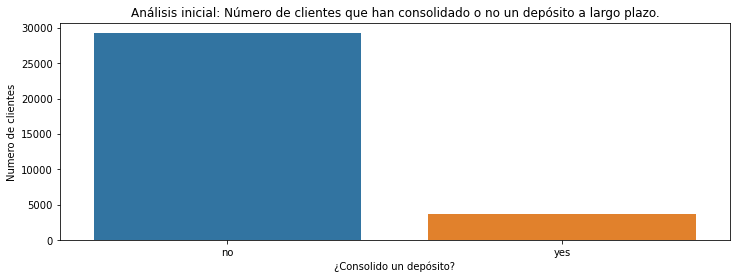

In [ ]:
# Analisis Inicial: columna target.

x = df['y']

fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(x=x, data=df)
ax.set(xlabel='¿Consolido un depósito?', ylabel='Numero de clientes', title='Análisis inicial: Número de clientes que han consolidado o no un depósito a largo plazo.')

x.value_counts()

En nuestro caso el target de este análisis es la variable 'Y'. Como dijimos anteriormente, esta nos indica si el cliente ha consolidado un depósito a largo plazo. Si consideramos la cantidad de resultados positivos vs negativos veremos que el 89% de los valores son negativos, versus el 11% correspondiente a los positivos.

c:\Users\vgard\anaconda3\envs\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

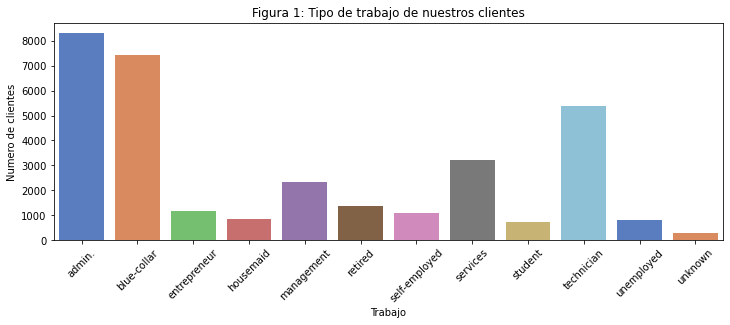

In [ ]:
#Figura 1: Tipos de trabajo de los clientes:

x=df["job"]
y=df["job"].value_counts()

fig, ax = plt.subplots(figsize=(12,4)) #En realidad no necesitamos agregar esta linea pero para acostumbrarme la agrego igual.
sns.barplot(y.index, y, data=df, palette="muted")
ax.set(xlabel='Trabajo', ylabel='Numero de clientes', title='Figura 1: Tipo de trabajo de nuestros clientes')
plt.xticks(rotation=45)

Se puede observar que la mayoria de nuestros clientes trabajan en relación de dependencia, dividiendose mayormente entre trabajos administrativos y trabajos técnicos o de cuello azul (obreros, trabajo manual)

Las edades van desde 17 hasta 98


[Text(0.5, 0, 'Edades'),
 Text(0, 0.5, 'Número de clientes'),
 Text(0.5, 1.0, 'Figura 2: Distribución de edades de los clientes')]

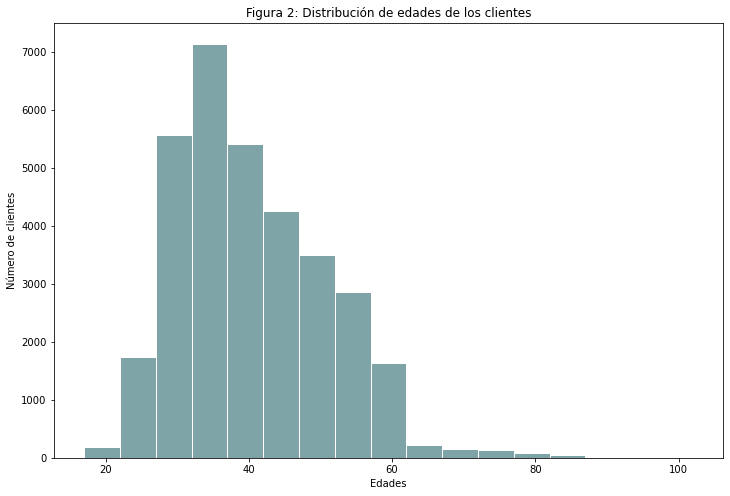

In [ ]:
#Figura 2: Edad de los clientes:

#Elegimos usar un histograma para representar las edades de los clientes. Para saber que tamaño de bins usar veamos
#entre que alores se encuentran las edades:

print("Las edades van desde", df["age"].min(), "hasta", df["age"].max())

fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df, x=df["age"], binwidth=5, color="#53868B", edgecolor="white")
ax.set(xlabel="Edades", ylabel="Número de clientes", title="Figura 2: Distribución de edades de los clientes")

Ademas, la mayoria de los clientes son personas jovenes, entre 30 y 50 años. Por otro lado notamos que la cantida de clientes mayores a 60 años es muy poca en comparacion, pero encontraremos algunos resultados interesantes posteriormente.

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Contacts'),
 Text(0.5, 1.0, 'Figura 3: Number of contacts')]

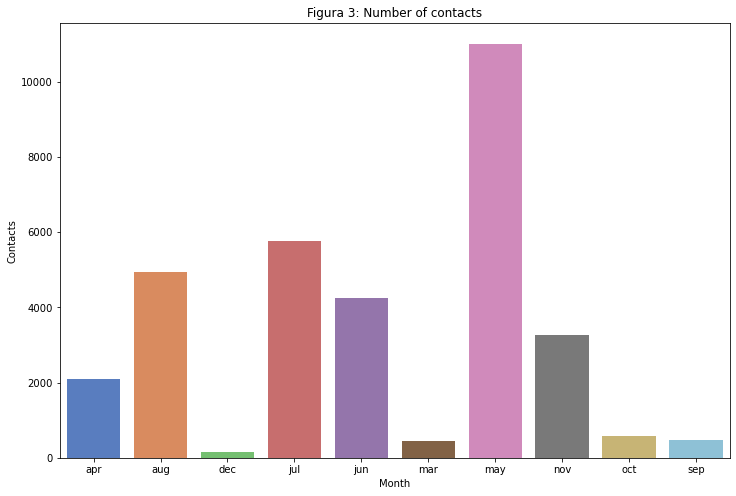

In [ ]:
#Figura 3: Mes en el que ocurrió el último contacto:

fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x = df['month'], palette="muted")
ax.set(xlabel = 'Month' , ylabel = 'Contacts' , title = 'Figura 3: Number of contacts')

En la última campaña de marketing se observa que en los meses de Mayo a Agosto es cuando se realizaron la mayoria de los últimos contactos telefónicos con los clientes. El año fiscal en Portugal es del 1 de Enero al 31 de Diciembre.

c:\Users\vgard\anaconda3\envs\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


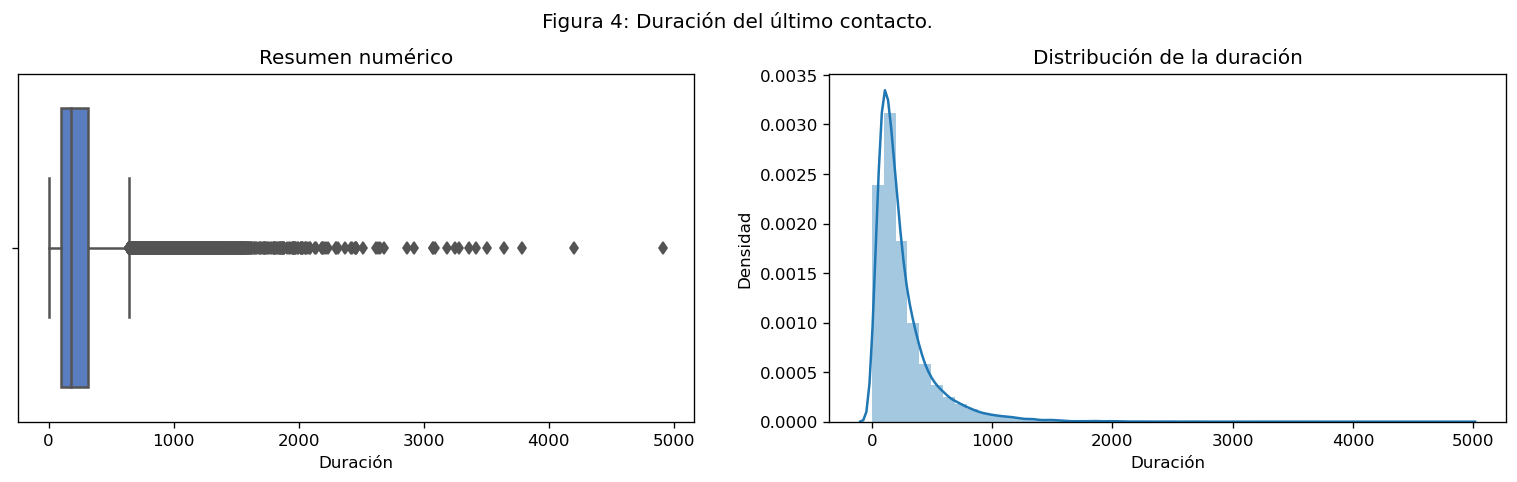

In [ ]:
#Figura 4: Duración de las llamadas.

fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 120, figsize =(16,4))

plot0 = sns.boxplot(x = df['duration'], ax = ax[0], palette="muted")
ax[0].set_xlabel('Duración')
ax[0].set_title('Resumen numérico')

plot1 = sns.distplot(x=df['duration'], ax = ax[1]) #bw_adjust=0.1
ax[1].set_xlabel('Duración')
ax[1].set_ylabel('Densidad')
ax[1].set_title('Distribución de la duración')
#ax.set(xlabel = 'Month' , ylabel = 'Contacts' , title = 'Number of contacts')

plt.suptitle("Figura 4: Duración del último contacto.", fontsize=12)
fig.subplots_adjust(top=0.85)

Si observamos los graficos queda claro que la gran mayoria de las llamadas a los clientes tienen una duración muy corta, pero que existen instancias donde las llamada son mucho mas largas.

c:\Users\vgard\anaconda3\envs\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'basic.6y'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'illiterate'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'unknown')])

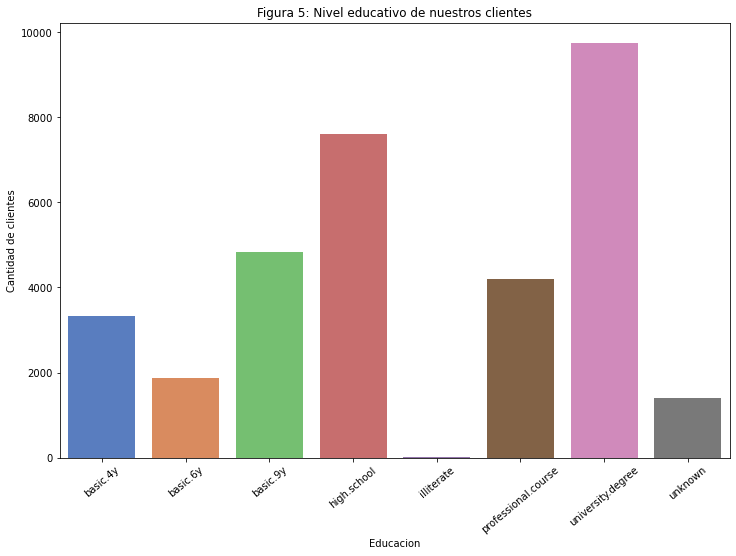

In [ ]:
#Figura 5: Educacion de los clientes

x=df["education"]
y=df["education"].value_counts()

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(y.index, y, data=df, palette="muted")
ax.set(xlabel = 'Educacion', ylabel = 'Cantidad de clientes', title = 'Figura 5: Nivel educativo de nuestros clientes')
plt.xticks(rotation=40)

La mayoria de los clientes presentan educación de nivel universitario, seguido de nivel secundario.

c:\Users\vgard\anaconda3\envs\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced'),
  Text(1, 0, 'married'),
  Text(2, 0, 'single'),
  Text(3, 0, 'unknown')])

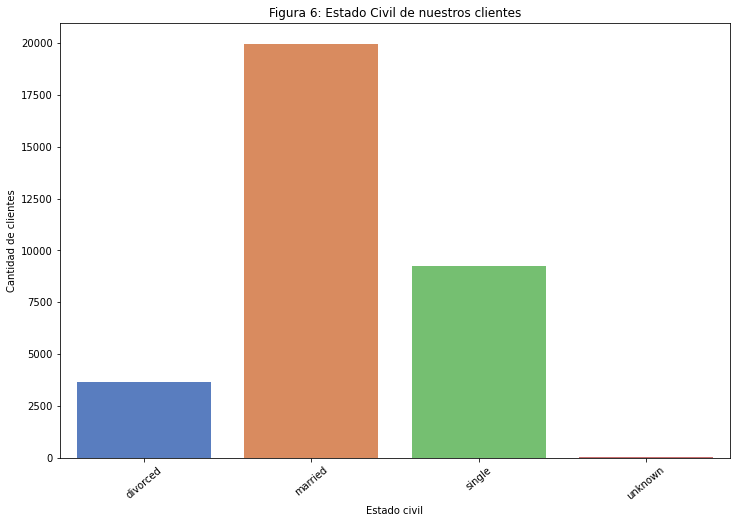

In [ ]:
#Figura 6: Estado civil de los clientes

x=df["marital"]
y=df["marital"].value_counts()

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(y.index, y, data=df, palette="muted")
ax.set(xlabel = 'Estado civil' , ylabel = 'Cantidad de clientes' , title = 'Figura 6: Estado Civil de nuestros clientes')
plt.xticks(rotation=40)

El estado civil de los clientes puede ser usado para considerar algunas estrategias de marketing. En nuestro caso, la gran mayoria se encuentra casado, seguido por una cantidad mucho menor de solteros.

#### Análisis Bivariado:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

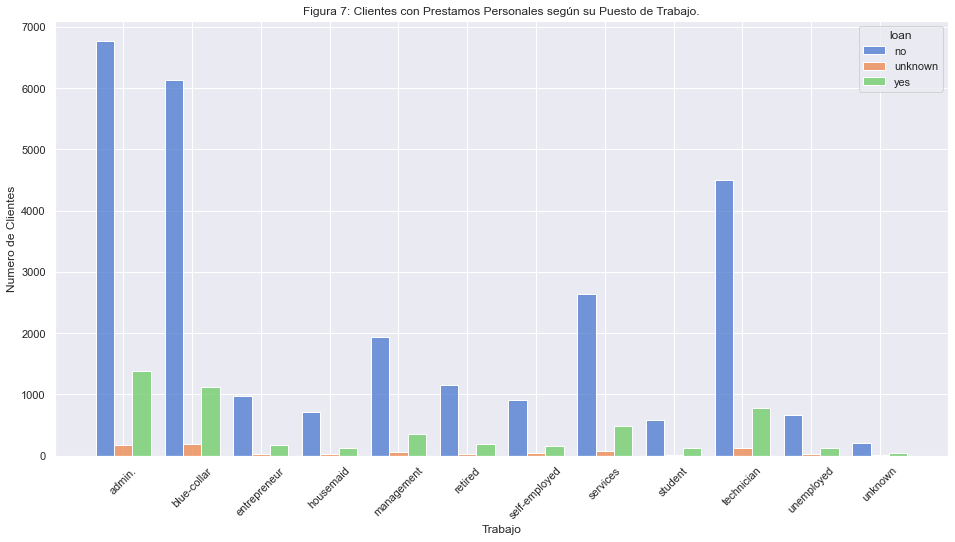

In [ ]:
#Figura 7: Prestamos personales vs. Puesto de Trabajo.

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(data = df, x = df["job"], hue = df["loan"], multiple = "dodge", shrink=.8, edgecolor = "white", palette="muted")
ax.set(xlabel = "Trabajo", ylabel = "Numero de Clientes", title = "Figura 7: Clientes con Prestamos Personales según su Puesto de Trabajo.")
plt.xticks(rotation=45)

Se observa que la mayoria de los clientes que presentan préstamos personales son aquellos en trabajos administrativos, técnicos o de cuello azul (obreros/trabajo manual). Ademas, si recordamos la Figura 1 se puede ver que una gran parte de los clientes ocupan este tipo de trabajos, por lo que tiene sentido que sea asi.

[Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Número de clientes'),
 Text(0.5, 1.0, 'Figura 8: Número de clientes con prestamos hipotecarios segun su edad')]

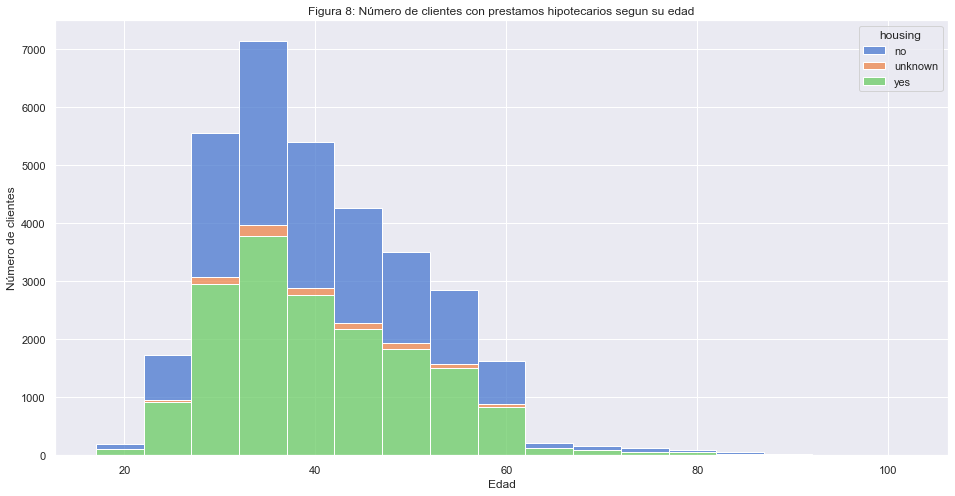

In [ ]:
#Figura 8: Edad con Presatmos Hipotecarios (o prestamos para comprar una casa):

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(data=df, x=df["age"], binwidth=5, hue=df["housing"], multiple="stack", palette="muted")
ax.set(xlabel = "Edad", ylabel = "Número de clientes", title="Figura 8: Número de clientes con prestamos hipotecarios segun su edad")

Se observa que una gran proporcion de los clientes tienen préstamos hipotecarios, mayormente entre los 25 a 40 años.

#### Análisis Multivariado:

[Text(0.5, 0, 'Duración del ultimo contacto con el cliente'),
 Text(0, 0.5, 'Edad del Cliente'),
 Text(0.5, 1.0, 'Figura 9: Relacion entre la edad de los clientes y el último contacto: Suscripcion a un depósito a largo plazo')]

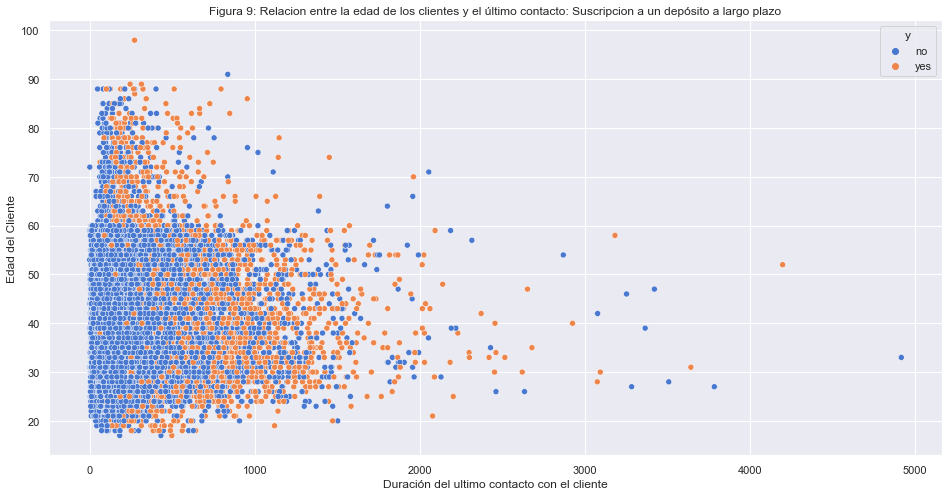

In [ ]:
#Figura 9: Edad del cliente, Duración del último contacto con el empleado bancario y Plazo Fijo.

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=df, x=df["duration"], y=df["age"], hue=df["y"], palette="muted")
ax.set(xlabel = "Duración del ultimo contacto con el cliente", ylabel = "Edad del Cliente", \
       title = "Figura 9: Relacion entre la edad de los clientes y el último contacto: Suscripcion a un depósito a largo plazo")

En este gráfico puede observarse que la duración de las llamadas tiende a ser mayor en los clientes de menos 60 años y menor en personas mayores. De cualquier manera, en todo el espectro de edades se observa que los clientes que suscribieron a un depósito a largo plazo fueron, en general, quienes mantuvieron llamadas de mayor duración.

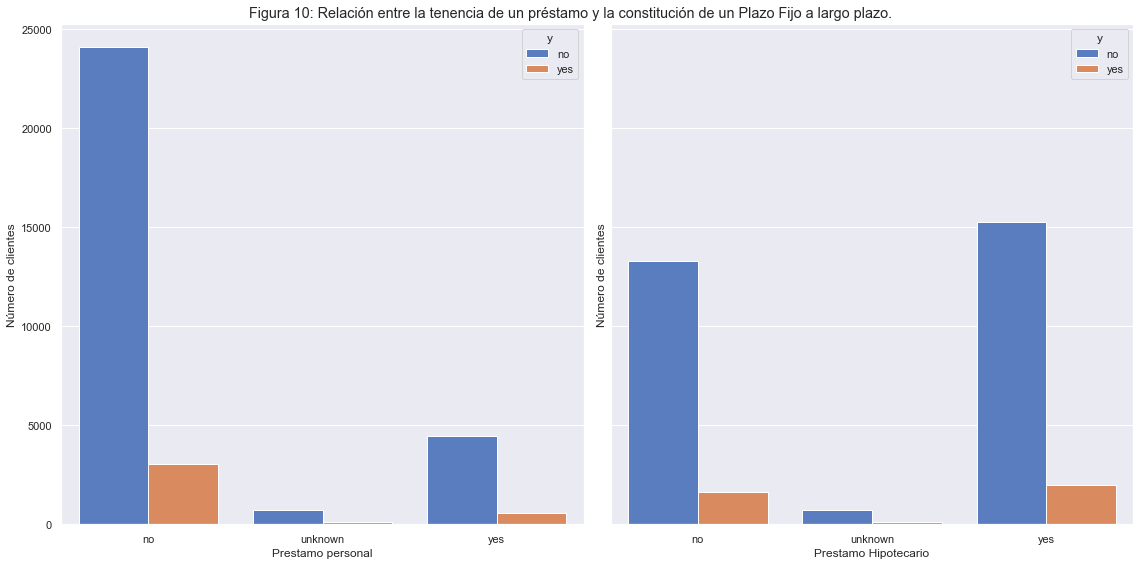

In [ ]:
#Figura 10: Duración del último contactos, préstamos personales y éxito de la última campaña:

sns.set()
fig, ax = plt.subplots(ncols = 2, figsize=(16,8), sharey=True)
edad_personal = sns.countplot(data=df, x=df["loan"], hue=df["y"], ax=ax[0], palette="muted")
edad_hipot = sns.countplot(data=df, x=df["housing"], hue=df["y"], ax=ax[1], palette="muted")

ax[0].set(xlabel = "Prestamo personal", ylabel = "Número de clientes")
ax[1].set(xlabel = "Prestamo Hipotecario", ylabel = "Número de clientes")

#Facilitamos la visualización:
fig.tight_layout()
plt.suptitle("Figura 10: Relación entre la tenencia de un préstamo y la constitución de un Plazo Fijo a largo plazo.")
fig.subplots_adjust(top=0.95)


En este gráfico nos propusimos ver si la tenencia de algun tipo de prestamo puede relacionarse con la constitución de un depósito a largo plazo.

Se aprecian dos distribuciones diferentes: en el caso de los individuos con prestamos personales la cantidad que realiza un depósito a largo plazo es sustancialmente menor, algo razonable considerando que estos prestamos suelen pedirse por una necesidad más inmediata de dinero y ser devueltos a corto-mediano plazo. Sin embargo, si hablamos de proporciones, el porcentaje de individuos que tiene preatamos personales y define un depósito a largo plazo es sustancialmente mayor que la cantidad de personas que no tienen un préstamo personal y sacan un depósito a largo plazo. Por otro lado, en el caso de los clientes con y sin prestamos hipotecarios la cantidad de individuos que establecen plazos fijos a largo plazo es mucho más similar: eso bien puede ser debido a que los creditos hipotecarios estan pensados para devolverse de forma regular y a un plazo mucho más largo, por lo que no refieren a una necesidad inmediata de dinero por parte del cliente sino a un proyecto a largo plazo.

Podemos usar esta información para focalizar las campañas de márketing en personas sin préstamos personales, o para ofrecer promociones de interes para personas con prestamos hipotecarios.

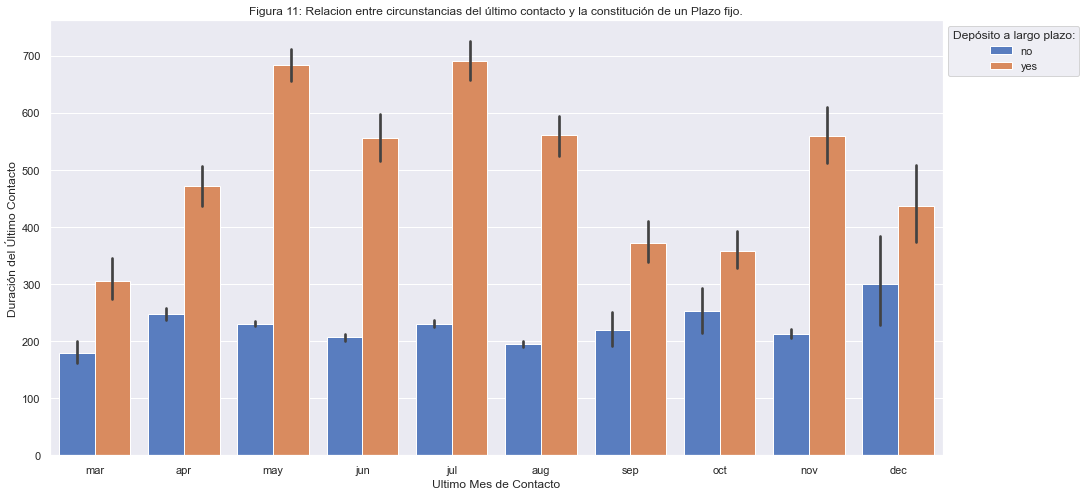

In [ ]:
#Figura 11: Relacion entre el tipo de trabajo, la tenencia de un Prestamo Hipotecario y la constitución de un Depósito a largo plazo:
orden=["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=df, x="month", order=orden, y="duration", hue="y", palette="muted")
ax.set(xlabel = "Ultimo Mes de Contacto", ylabel = "Duración del Último Contacto", title = "Figura 11: Relacion entre circunstancias del último contacto y la constitución de un Plazo fijo.")
plt.legend(title="Depósito a largo plazo:", loc=2, bbox_to_anchor = (1,1))

En este caso analizamos la longitud media del último contacto entre empleado y cliente segun el mes en que se realizó, y analizamos si presenta alguna relacion con la suscripcion a un plazo fijo o depósito a largo plazo.
Si lo analizamos en conjunto con la figura 9 nuevamente se observa que en los casos donde se logró que el cliente hiciera un depósito a largo plazo tambien se dio que la longitud del último contacto con el cliente fue sustancialmente más largo, sin embargo, en los meses de Marzo, Septiembre y Octubre la duración en los casos "positivos" fue sustancialmente más corta.

[Text(0.5, 0, 'Último mes de contacto'),
 Text(0, 0.5, 'Edad del Cliente'),
 Text(0.5, 1.0, 'Figura 12: Relacion entre la edad de los clientes y el último contacto: Suscripcion a un Plazo fijo a largo plazo')]

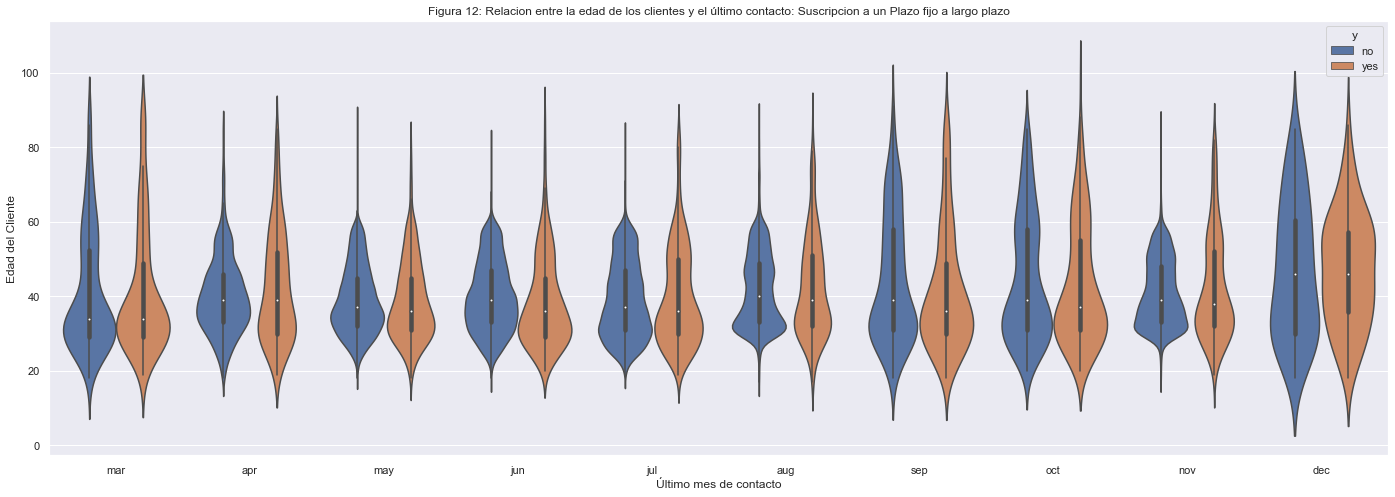

In [ ]:
#Figura 12: Relación entre la edad de los clientes, el último mes de contacto y la acreditación de un depósito a largo plazo:

sns.set()
fig, ax = plt.subplots(figsize=(24,8))
trabajo_prestamo_civil = sns.violinplot(data=df, x=df["month"], y=df["age"], hue=df["y"], order=orden)
ax.set(xlabel = "Último mes de contacto", ylabel = "Edad del Cliente", title = "Figura 12: Relacion entre la edad de los clientes y el último contacto: Suscripcion a un Plazo fijo a largo plazo")

Este gráfico complementa la figura 11. En este caso se muestra la distribución de las edades de los clientes que hicieron o no un depósito a largo plazo segun el último mes de contacto.

En la figura 9 habiamos visto que entre los clientes sobre 60 años se observaba una mayor proporción de resultados positivos que para menores de 60, aun cuando la duración del último contacto fuera sustancialmente menor. En la figura 11 pudimos observar que en los meses de Marzo, Septiembre y Octubre la longitud de las llamadas que corresponden al último contacto disminuyen, por lo que podria haber una relación entre ambos resultados.

Para analizar esta hipotesis hicimos la figura 12: este nos indica la distribución de las edades de los clientes segun el último mes de contacto. Lo que podemos ver es que en los meses de Marzo, Septiembre y Octubre el grafico de violin indica que hubo una mayor cantidad de clientes de más de 60 años a comparación del resto de los meses. A pesar de que es dificil saber el por qué de este comportamiento, puede ser usado como una posible estrategia de marketing si el comportamiento se mantiene.

Adjuntamos una pequeña tabla que nos permite visualizar la cantidad de clientes que hicieron un depósito a largo plazo segun el mes del último contacto: como podemos ver, aunque la cantidad global de los clientes que dieron resultados positivos es menor, la cantidad de clientes que dieron resultados en esos meses es sustancialmente mas chica que en otros meses, por lo que el porcentaje del total es de casi el

In [ ]:
#Adjunto una pequeña tabla que nos permite ver la relación entre el número de clientes que hicieron un depósito a largo plazo y los que no según el mes.

cant_mes = df[["month","y"]].groupby("month").count()

yes = df[df["y"] == "yes"][["month","y"]].groupby("month").count()
no = df[df["y"] == "no"][["month","y"]].groupby("month").count()


yes.rename(columns = {'y':'yes'}, inplace = True)
no.rename(columns = {'y':'no'}, inplace = True)

#for i in yes:
#    dt["perc_yes"][i] = yes[i]/cant_mes[i]

dt = pd.concat([yes, no], axis=1)
dt

,yes,no
month,,
apr,427,1658
aug,531,4417
dec,72,71
jul,532,5231
jun,441,3806
mar,217,219
may,699,10312
nov,332,2934
oct,254,333


#### Análisis General:

Realizamos una copia del dataset para poder armar un primer análisis de las variables categóricas. En este caso debemos tener en cuenta que se usó un método automatizado para codificar variables las categóricas a numéricas, por lo que los números usados pueden no ser los óptimos.

In [ ]:
#Pasamos las variables categóricas a números y hacemos un pairplot:

df2 = df.copy(deep=True)

cols = df2.select_dtypes(include=["category"]).columns

df2[cols] = df2[cols].apply(lambda x: x.cat.codes)
df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,999,0,1,0
32946,52,9,1,5,0,2,0,0,7,0,64,1,999,1,0,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,999,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1,0


In [ ]:
#Generamos el pairplot:

sns.set()
sns.pairplot(df2.sample(10000), corner=True, hue="y", kind="kde")
plt.show()


**Precaución:** Para poder graficar las relaciones, dado las limitaciónes de Google Colab, tuvimos que seleccionar un sample aleatorio de 10.000 registros.

### Próximos objetivos:

Luego de realizar este análisis se procederá a realizar el entrenamiento de un algoritmo de Machine Learning, de forma de que podamos realizar la clasificación de un registro de clientes secundario (Dataset de testeo).

## Segunda/Tercera Entrega:

Para poder determinar de forma clara que clientes tienene mayor probabilidad de irse vamos a entrenar un conjunto de algoritmos de Machine Learning, los cuales luego evaluaremos para quedarnos con el mejor.

In [ ]:
#Libraries necesarias

from pycaret.classification import *

In [ ]:
#Iniciamos el entorno de aprendizaje:

modelos_clasif = setup(data = df2, target = "y", normalize=True)

,Description,Value
0,session_id,1682
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(32950, 16)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#Comparamos los diferentes modelos:

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9089,0.9289,0.4469,0.6381,0.5251,0.4765,0.4860,6.7530
lightgbm,Light Gradient Boosting Machine,0.9078,0.9268,0.4480,0.6274,0.5225,0.4731,0.4814,0.1580
xgboost,Extreme Gradient Boosting,0.9074,0.9232,0.4580,0.6206,0.5265,0.4766,0.4836,1.2320
gbc,Gradient Boosting Classifier,0.9066,0.9227,0.3980,0.6377,0.4895,0.4412,0.4563,1.0040
rf,Random Forest Classifier,0.9050,0.9154,0.3691,0.6349,0.4664,0.4183,0.4371,0.7560
lr,Logistic Regression,0.9041,0.8855,0.3260,0.6492,0.4333,0.3872,0.4151,1.4990
ada,Ada Boost Classifier,0.9025,0.9098,0.3683,0.6127,0.4596,0.4097,0.4260,0.3520
lda,Linear Discriminant Analysis,0.9024,0.8855,0.3888,0.6049,0.4728,0.4219,0.4347,0.0650
ridge,Ridge Classifier,0.9019,0.0000,0.2775,0.6529,0.3886,0.3447,0.3826,0.0320
svm,SVM - Linear Kernel,0.9008,0.0000,0.2940,0.6264,0.3930,0.3480,0.3803,0.1090


Como podemos ver, aunque tengan una muy buena puntuación AUC se obserba que ninguno de los modelos tiene una puntuacion de recall particularmente buena.

Por obtener mejores puntuaciones iniciales, vamos a elegir el modelo "Light Gradient Boosting Machine".

In [ ]:
lightgbm = create_model("lightgbm", class_weight='balanced')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8522,0.9211,0.8692,0.4240,0.5700,0.4932,0.5396
1,0.8492,0.9308,0.8769,0.4191,0.5672,0.4893,0.5383
2,0.8617,0.9277,0.8577,0.4416,0.5830,0.5101,0.5506
3,0.8682,0.9327,0.8615,0.4553,0.5957,0.5258,0.5640
4,0.8439,0.9236,0.8417,0.4060,0.5477,0.4670,0.5124
5,0.8578,0.9296,0.8764,0.4340,0.5806,0.5064,0.5518
6,0.8552,0.9248,0.8769,0.4302,0.5772,0.5019,0.5483
7,0.8573,0.9196,0.8231,0.4306,0.5654,0.4899,0.5267
8,0.8513,0.9310,0.9000,0.4247,0.5771,0.5005,0.5526


In [ ]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=2462, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [ ]:
tuned_light = tune_model(lightgbm, n_iter=100, optimize='recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8301,0.9231,0.8859,0.3916,0.5431,0.4573,0.5149
1,0.8253,0.9192,0.8897,0.3849,0.5373,0.4497,0.5098
2,0.8418,0.9295,0.9202,0.4130,0.5701,0.4898,0.5489
3,0.8440,0.9298,0.9011,0.4151,0.5683,0.4885,0.5433
4,0.8443,0.9316,0.8893,0.4139,0.5648,0.4850,0.5377
5,0.8391,0.9230,0.8664,0.4032,0.5503,0.4678,0.5186
6,0.8313,0.9212,0.8779,0.3918,0.5418,0.4564,0.5123
7,0.8452,0.9210,0.8740,0.4141,0.5620,0.4821,0.5318
8,0.8309,0.9225,0.8817,0.3915,0.5423,0.4568,0.5135


In [ ]:
print(tuned_light)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight='balanced', colsample_bytree=1.0,
               feature_fraction=0.9, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=46, min_child_weight=0.001,
               min_split_gain=0, n_estimators=300, n_jobs=-1, num_leaves=200,
               objective=None, random_state=3941, reg_alpha=0.001,
               reg_lambda=0.001, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


Al hacer el entrenamiento y posterior afinacion de uno de los modelos observamos que las puntuaciones del modelo inicialmente planteado son ligeramente mejores que las puntuaciones de los modelos afinados. Buscando un poco de información descubrimos que esto podia pasar y que ajustando los parámetros de la funcion "tune_model()" podiamos intentar mejorar el proceso de afinado: seleccionando el puntaje de Recall como el que queremos optimizar (optimize="recall) y aumentando el número de iteraciones (n_iter=1000). El resultado obtenido es ligeramente mejor que el inicial con respecto a la puntuación de recall, pero a costa de una disminución pequeña del Accuracy. **Elegiremos el primer modelo para seguir con el análisis.**

Parámetros definidos:

Los siguientes parámetros son definidos por defecto:

* Bagging_fraction: se toma un sample aleatorio de la base de datos, en nuestro caso, del 70%.
* Bagging_freq: indica luego de cuentas iteraciones se reemplaza el sample, en nuestro caso, despues de 1 iteración.
* max_depth: indica la profundidad máxima de el arbol. un valor de -1 indica que no tiene un límite definido.
* n_estimators: indica el número de árboles a ajustar. En nuestro caso, es de 230.
* num_leaves: maximo número de hojas (o nodos), en nuestro caso, 70.

Para hacer más completo este análisis vamos a probar otros modelos: usaremos aquellos provistos en la biblioteca sklearn: Decision Tree Classifier, Random Forest Classifier, K-Neighbors Classifier y Logistic Regression.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from mlflow.sklearn import save_model, load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder


Para mejorar el resultado obtenido vamos a hacer validación cruzada de los datos, haciendo un total de 6 divisiones de los datos en conjuntos de testeo y entrenamiento.

In [ ]:
X = df2.drop("y",axis=1).values
y = df2["y"].values
kf = KFold(n_splits=6, shuffle=True, random_state=42)
kf.get_n_splits(X)

6

**Decision Tree Classifier**: seleccionamos una profundidad máxima del arbol (max_depth) igual a 5 (se probaron valores de 4 a 10) y usamos el parámetro 'class_weight="balanced"', con el cual nos aseguramos que para cada subconjunto de entrenamiento cada clase tenga un peso inversamente proporcional a la cantidad de registros que tenemos: para la clase 1 (resultado positivo, el cliente creó un plazo fijo), como tenemos menor cantidad de registros le dara mayor peso a la hora de entrenar el modelo.


In [ ]:
#Decision Tree Classifier:

recall_DT = {"train":[], "test":[]}
accuracy_DT = {"train":[], "test":[]}

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index] #Definimos los datasets a usar para validación cruzada.
  y_train, y_test = y[train_index], y[test_index]

  modelo = DecisionTreeClassifier(max_depth = 5, random_state=0, class_weight="balanced")
  modelo.fit(X_train, y_train)

  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)

  recall_DT["train"].append(recall_score(y_train, y_pred_train))
  recall_DT["test"].append(recall_score(y_test, y_pred_test))

  accuracy_DT["train"].append(accuracy_score(y_train, y_pred_train))
  accuracy_DT["test"].append(accuracy_score(y_test, y_pred_test))

train_recall = np.mean(recall_DT["train"])
test_recall = np.mean(recall_DT["test"])

train_accuracy = np.mean(accuracy_DT["train"])
test_accuracy = np.mean(accuracy_DT["test"])

print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')

Recall promedio del conjunto de entrenamiento: 0.8698446081518636
Recall promedio del conjunto de testeo: 0.8591973877732751
Accuracy promedio del conjunto de entrenamiento: 0.7833990025921774
Accuracy promedio del conjunto de testeo: 0.7800920862844314
Los parámetros en el modelo son: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}


**Random Forest Classifier**: Seleccionamos una profundidad máxima de 6 (max_depth=6) luego de evaluar valores entre 5 y 10, y usamos el parámetro 'class_weight="balanced"' nuevamente. El n_estimators=100 nos indica el número de arboles que vamos a entrenar.

In [ ]:
#Random Forest Classifier

recall_RF = {"train":[], "test":[]}
accuracy_RF = {"train":[], "test":[]}

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index] #Definimos los datasets a usar para validación cruzada.

  modelo = RandomForestClassifier(max_depth = 6, class_weight="balanced")
  modelo.fit(X_train, y_train)

  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)

  recall_RF["train"].append(recall_score(y_train, y_pred_train))
  recall_RF["test"].append(recall_score(y_test, y_pred_test))

  accuracy_RF["train"].append(accuracy_score(y_train, y_pred_train))
  accuracy_RF["test"].append(accuracy_score(y_test, y_pred_test))

train_recall = np.mean(recall_RF["train"])
test_recall = np.mean(recall_RF["test"])

train_accuracy = np.mean(accuracy_RF["train"])
test_accuracy = np.mean(accuracy_RF["test"])

print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')

Recall promedio del conjunto de entrenamiento: 0.8336358260877851
Recall promedio del conjunto de testeo: 0.814924154631186
Accuracy promedio del conjunto de entrenamiento: 0.8408133561717192
Accuracy promedio del conjunto de testeo: 0.8370868435134692
Los parámetros en el modelo son: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


**Logistic Regresion**: Para este modelo seteamos el parámetro 'class_weight="balanced"' nuevamente.

In [ ]:
# Logistic Regresion

recall_LR = {"train":[], "test":[]}
accuracy_LR = {"train":[], "test":[]}

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index] #Definimos los datasets a usar para validación cruzada.

  modelo = LogisticRegression(class_weight="balanced")
  modelo.fit(X_train, y_train)

  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)

  recall_LR["train"].append(recall_score(y_train, y_pred_train))
  recall_LR["test"].append(recall_score(y_test, y_pred_test))

train_recall = np.mean(recall_LR["train"])
test_recall = np.mean(recall_LR["test"])

train_accuracy = np.mean(accuracy_LR["train"])
test_accuracy = np.mean(accuracy_LR["test"])

print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')

Recall promedio del conjunto de entrenamiento: 0.7527032891149941
Recall promedio del conjunto de testeo: 0.7545203370789012
Accuracy promedio del conjunto de entrenamiento: nan
Accuracy promedio del conjunto de testeo: nan
Los parámetros en el modelo son: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


**K-Neighbors Classifier**:

**ANOTACIÓN**: Aca es donde tuve problemas: trate de usar el StandardScaler y funciono, se genero una base de datos que tiene valores normalizados. El problema es que no se puede usar como esta, porque el modelo no acepta valores continuos. Trate de usar el LabelEncoder() y se generó una base de datos con valores de 0 y 1, pero no estoy segura si esta funcionando como corresponde. Si pudieran darle una mirada a ver si les parece bien estaria barbaro.

Agregando el parámetro 'weights' en la linea correspondiente la modelo se puede cambiar de 'uniform', que es por defecto (descripcion: All points in each neighborhood are weighted equally.) por 'distance' (descripcion: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.) y termina siendo el acuracy y el recall del conjunto de entrenamiento igual a 1, por lo que me parecio que no estaba bueno.

In [ ]:
#K-Neighbours Classifier:

scalar = StandardScaler()
lab_enc = LabelEncoder()
df_scaled = pd.DataFrame(scalar.fit_transform(df2),columns = df2.columns)
df_encoded = pd.DataFrame()

for column in df_scaled:
    temp = pd.Series(lab_enc.fit_transform(df_scaled[column]))
    df_encoded[column] = temp

X_scaled = df_encoded.drop("y",axis=1).values
y_scaled = df_encoded['y'].values
kf_scaled = KFold(n_splits=6, shuffle=True, random_state=42)
kf_scaled.get_n_splits(X_scaled)

recall_KNN = {"train":[], "test":[]}
accuracy_KNN = {"train":[], "test":[]}

for train_index, test_index in kf_scaled.split(X_scaled):
  X_train, X_test = X[train_index], X[test_index] #Definimos los datasets a usar para validación cruzada.
  y_train, y_test = y[train_index], y[test_index]

  modelo = KNeighborsClassifier(n_neighbors=5)
  modelo.fit(X_train, y_train)

  y_pred_train = modelo.predict(X_train)
  y_pred_test = modelo.predict(X_test)

  recall_KNN["train"].append(recall_score(y_train, y_pred_train))
  recall_KNN["test"].append(recall_score(y_test, y_pred_test))

  accuracy_KNN["train"].append(accuracy_score(y_train, y_pred_train))
  accuracy_KNN["test"].append(accuracy_score(y_test, y_pred_test))

train_recall = np.mean(recall_KNN["train"])
test_recall = np.mean(recall_KNN["test"])

train_accuracy = np.mean(accuracy_KNN["train"])
test_accuracy = np.mean(accuracy_KNN["test"])


print(f"Recall promedio del conjunto de entrenamiento: {train_recall}\nRecall promedio del conjunto de testeo: {test_recall}")
print(f"Accuracy promedio del conjunto de entrenamiento: {train_accuracy}\nAccuracy promedio del conjunto de testeo: {test_accuracy}")

print(f'Los parámetros en el modelo son: {modelo.get_params()}')

Recall promedio del conjunto de entrenamiento: 0.4764692793993525
Recall promedio del conjunto de testeo: 0.3804709213956146
Accuracy promedio del conjunto de entrenamiento: 0.9206919567511647
Accuracy promedio del conjunto de testeo: 0.8989680812085229
Los parámetros en el modelo son: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Por los resultados obtenidos vamos a elegir el modelo de "Light Gradient Boosting Machine" sin ajustar. Hacemos las predicciones:

In [ ]:
df3 = df2.drop(['y'], axis=1)
predicciones = predict_model(lightgbm, data=df3)
df2[['Label', 'Score']] = predicciones[['Label', 'Score']]
df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Label,Score
0,49,1,1,2,1,0,0,0,7,4,227,4,999,0,1,0,0,0.9848
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0,0,0.9312
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1,1,0.9352
3,36,0,1,6,0,2,0,1,6,1,120,2,999,0,1,0,0,0.9842
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0,1,0.8961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,999,0,1,0,0,0.8566
32946,52,9,1,5,0,2,0,0,7,0,64,1,999,1,0,0,0,0.9868
32947,54,0,1,2,0,0,2,0,3,1,131,4,999,0,1,0,0,0.9687
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1,0,0,0.9435


Podemos mostrar algunos gráficos de interes que nos muestran la performance del modelo:

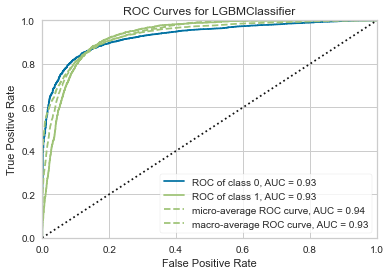

In [ ]:
plot_model(lightgbm, plot = 'auc')



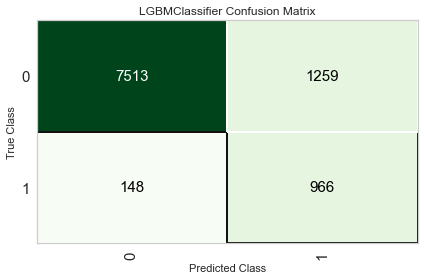

In [ ]:
plot_model(lightgbm, plot = 'confusion_matrix')

Ahora podemos usar nuestro modelo para hacer predicciones sobre un conjunto de testeo "real".